# 07_06: Unisex Name Solution

In [2]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
pd.options.display.max_rows = 10

As I mentioned already, in Pandas there are often several ways to get the same result. So if your results are similar to mine but you get them in a different way, don't worry! Your solution may even be better than mine!

We load our dataset as usual.

In [4]:
allyears = pd.read_csv('allyears.csv.gz')

We need to compute the total number of boys and girls for a given name. This seems a good place to use `groupby`, which lets us segment the data before applying an _aggregation_ (in the case the sum of the number of babies).

In [176]:
totals = allyears.groupby(['sex','name']).number.sum()

We segment by sex and name, so the resulting series has a sex-and-name multiindex.

In [197]:
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

We can grab the males and females respectively using `.loc`.

In [219]:
male, female = totals.loc['M'], totals.loc['F']

Now these are series indexed by name only. Not all names will be present in both!

In [222]:
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [223]:
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

Nevertheless, we can combine the two series (specifically, take the ratio), and pandas will _align_ the indices for us; the result will be NaN where either series has no value.

In [235]:
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

We can certainly get rid of those nans, with `dropna()`.

In [225]:
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

Now remember the definition of unisex names as those with the ratio between 0.5 and 2. That's a good boolean expression for fancy indexing. 1660 names pass the test!

In [233]:
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In fact, we don't need the ratios, but only the index of the subset that passes the test. That's our list of unisex names.

In [240]:
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

The next thing to do is find the ten most _common_ unisex names. So we sum the male and female counts, using unisex to index our two totals. We sort the resulting series, and cut it off at the top.

In [246]:
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

Jessie is the winner of this particular context, followed by Riley, Casey, and Jackie.

In [250]:
common

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: number, dtype: int64

To plot, it's convenient to use a fully indexed df.

In [259]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In these plots, Jessie appears to have fallen out of favor somewhat. Riley is ascendent (but not for boys anymore); Casey, which peaked around 1990, may be the most unisex of all.

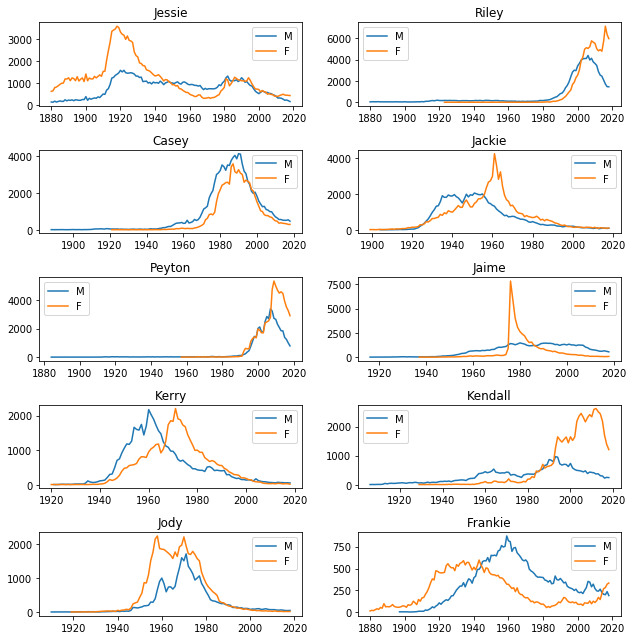

In [260]:
pp.figure(figsize=(9,9))

for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)

    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)
    
pp.tight_layout()

[...Suitably celebratory statement...]